In [1]:
#Please execute this cell
import sys
sys.path.append('../')
import jupman
from sciprog import draw_mat, draw_adj, draw_nx
%matplotlib inline

# Graph formats solutions

## [Download exercises zip](../_static/generated/graph-formats.zip)

[Browse files online](https://github.com/DavidLeoni/sciprog-ds/tree/master/graph-formats)

## Introduction

Usual matrices from linear algebra are of great importance in computer science because they are widely used in many  fields, for example in machine learning and network analysis. This tutorial will give you an appreciation of the meaning of matrices when considered as networks or, as we call them in computer science, _graphs_. We will also review other formats for storing graphs, such as _adjacency lists_ and a have a quick look at a specialized library called Networkx.

In Part A we will limit ourselves to graph formats in this notebook and see some theory in separate [binary relations notebook](https://sciprog.davidleoni.it/binary-relations/binary-relations-sol.html), while in Part B of the course will focus on [graph algorithms](https://sciprog.davidleoni.it/graph-algos/graph-algos.html).



### What to do

- unzip exercises in a folder, you should get something like this: 

```

-jupman.py
-sciprog.py
-exercises
     |- graph-formats
         |- graph-formats-exercise.ipynb     
         |- graph-formats-solution.ipynb
```

<div class="alert alert-warning">

**WARNING**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>


- open Jupyter Notebook from that folder. Two things should open, first a console and then browser. The browser should show a file list: navigate the list and open the notebook `graph-formats/graph-formats-exercise.ipynb`

<div class="alert alert-warning">

**WARNING 2**: DO NOT use the _Upload_ button in Jupyter, instead navigate in Jupyter browser to the unzipped folder !
</div>


- Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`


### Required libraries

In order for visualizations to work, you need installed the python library `networkx` and `pydot`. Pydot is an interface to the non-pyhon package [GraphViz](http://graphviz.org/).

**Anaconda:**

From Anaconda Prompt:

1. Install GraphViz:

```bash
conda install graphviz
```

2. Install python packages:

```bash
conda install pydot networkx
```

**Ubuntu**

From console: 

1. Install PyGraphViz (note: you should use apt to install it, pip might give problems):

```bash
sudo apt install python3-pygraphviz
```

2. Install python packages:

```bash
python3 -m pip install --user pydot networkx
```

### Graph definition

In computer science a _graph_ is a set of verteces V (also called _nodes_) linked by a set of edges E. You can visualize nodes as circles and links as lines. If the graph is _undirected_, links are just lines, if the graph is _directed_, links are represented as arrows with a tip to show the direction:

![graph dir undir jk3234234u](img/graph-dir-undir.png)

![graph adjacent 8743gh4](img/graph-adjacent.png)

For our purposes, we will consider directed graphs (also called _digraphs_).

Usually we will indicate nodes with numbers going from zero included but optionally they can be labelled. Since we are dealing with directed graphs, we can have an arrow going for example from node `1` to node `2`, but also another arrow going from node `2` to node `1`. Furthemore, a node (for example node `0`) can have a _cap_, that is an edge going to itself:

![graph dir boolean 34243](img/graph-dir-boolean.png)


### Edge weights

Optionally, we will sometimes assign a _weight_ to the edges, that is a number to be shown over the edges. So we can modify the previous example. Note we can have an arrow going from node `1` to node `2` with a weight which is different from the weight arrow from `2` to `1`:

![graph dir different weights 34343iu4](img/graph-dir-different-weights.png)

### Matrices

Here we will represent graphs as matrices, which performance-wise is particularly good when the matrix is _dense_, that is,  has many entries different from zero. Otherwise, when you have a so-called _sparse_ matrix (few non-zero entries), it is best to represent the graph with _adjacency list_,  but we will deal with them later.

If you have a directed graph (digraph) with `n` verteces, you can represent it as an `n x n` matrix by considering each row as vertex:
    
* A row at index `i` represents the outward links from node `i` to the other `n` nodes, with possibly node `i` itself included. 
* A value of zero means there is no link to a given node. 
* In general, `mat[i][j]` is the weight of the edge between node `i` to node `j`


### Visualization examples

We defined a function `sciprog.draw_mat`to display matrices as graphs (you don't need to understand the internals, for now we won't go into depth about matrix visualizations). 

If it doesn't work, see above [Required libraries paragraph](#Required-libraries)

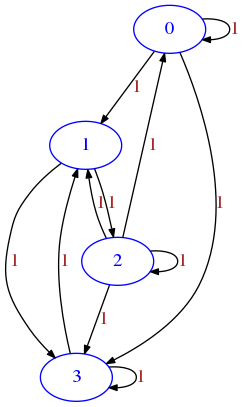

In [2]:
# PLEASE EXECUTE THIS CELL TO CHECK IF VISUALIZATION IS WORKING

# notice links with weight zero are not shown)
# all weights are set to 1

# first need to import this
import sys
sys.path.append('../')
from sciprog import draw_mat

mat = [
    [1,1,0,1],  # node 0 is linked to node 0 itself, node 1 and node 2
    [0,0,1,1],  # node 1 is linked to node 2 and node 3
    [1,1,1,1],  # node 2 is linked to node 0, node 1, node 2 itself and node 3
    [0,1,0,1]   # node 3 is linked to node 1 and node 3 itself
  ]


draw_mat(mat)


### Saving a graph to a file

If you want (or if you are not using Jupyter), optionally you can save the graph to a .png file by specificing the `save_to` filepath:

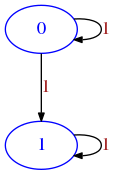

Image saved to file:  example.png


In [3]:
mat = [
        [1,1],
        [0,1]
      ]
draw_mat( mat, save_to='example.png')

### Minimal graph

With this representation derived from matrices as we intend them (that is with at least one row and one column), the corresponding minimal graph can have only one node:

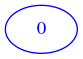

In [4]:
minimal = [
    [0]
]

draw_mat(minimal)

If we set the weight different from zero,  the zeroeth node will link to itself (here we put the weight 5 in the link):

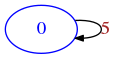

In [5]:
minimal = [
    [5]
]

draw_mat(minimal)

### Graph with two nodes example

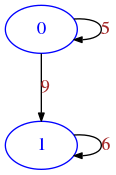

In [6]:
m = [
    [5,9], # node 0 links to node 0 itself with a weight of 5, and to node 1 with a weight of 9
    [0,6], # node 1 links to node 1 with a weight of 6
    
]

draw_mat(m)

### Distance matrix

Depending on the problem at hand, it may be reasonable to change the weights. For example, on a road network the nodes could represent places and the weights could be the distances. If we assume it is possible to travel in both directions on all roads, we get a matrix symmetric along the diagonal,  and we can call the matrix a  _distance matrix_. Talking about the diagonal, for the special case of going from a place to itself, we set that street length to 0 (which make sense for street length but could give troubles for other purposes, for example if we give the numbers the meaning 'is connected' a place should always be connected to itself)

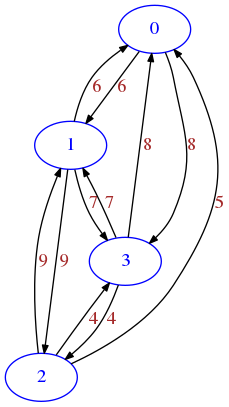

In [7]:
# distance matrix example 

mat = [
        [0,6,0,8],  # place 0 is linked to place 1 and place 2
        [6,0,9,7],  # place 1 is linked to place 0, place 2 and place 3
        [5,9,0,4],  # place 2 is linked to place 0, place 1 and place 3
        [8,7,4,0]   # place 3 is linked to place 0, place 1 and place 2 
      ]


draw_mat(mat)

More realistic traffic road network,  where going in one direction might take actually longer  than going back, because of one-way streets and different routing times.


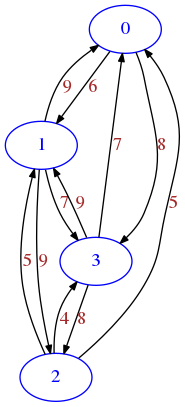

In [8]:

mat = [
        [0,6,0,8],  # place 0 is linked to place 1 and place 2
        [9,0,9,7],  # place 1 is linked to place 0, place 2 and place 3
        [5,5,0,4],  # place 2 is linked to place 0, place 1 and place 3
        [7,9,8,0]   # place 3 is linked to place 0, place 1, place 2 
      ]


draw_mat(mat)

### Boolean matrix example

If we are not interested at all in the weights, we might use only zeroes and ones as we did before. But this could have implications when doing operations on matrices, so some times it is better to use only `True` and `False`

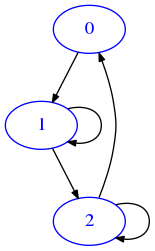

In [9]:
mat = [
    [False, True, False],
    [False, True, True],
    [True, False, True],
    
]
draw_mat(mat)

### Matrix exercises

We are now ready to start implementing the following functions. Before even start implementation, for each try to interpret the matrix as a graph, drawing it on paper. When you're done implementing try to use `draw_mat` on the results.  Notice that since `draw_mat`  is a generic display function and knows nothing about the nature of the graph, sometimes it will  not show the graph in the optimal way we humans would use.

### line

✪✪ This function is similar to `diag`. As that one, you can implement it in two ways: you can use a double `for`, or a single one. For the sake of the first part of the course the double `for` is acceptable, but in the second part it would be considered a waist of computing cycles.

What would be the graph representation of `diag` ?

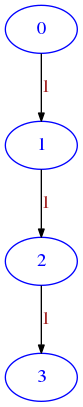

In [10]:

def line(n):
    """ RETURN a matrix as lists of lists where node i must have an edge to node i + 1 with weight 1
        Last node points to nothing
        n must be >= 1, otherwise rises ValueError        
    """
    #jupman-raise
    if n < 1:
        raise ValueError("Invalid n %s" % n)
    ret = [[0]*n for i in range(n)]
    for i in range(n-1):
        ret[i][i+1] = 1
    return ret
    #/jupman-raise
    
assert line(1) == [
                    [0]
                  ]
assert line(2) == [
                    [0,1],
                    [0,0]
                  ]
assert line(3) == [
                    [0,1,0],
                    [0,0,1],
                    [0,0,0]
                  ]

assert line(4) == [
                    [0,1,0,0],
                    [0,0,1,0],
                    [0,0,0,1],
                    [0,0,0,0]
                  ]
draw_mat(line(4))

### cross

✪✪ RETURN a nxn matrix filled with zeros except on the crossing lines.

- `n` must be >=1 and odd, otherwise a `ValueError` is thrown

Example for `n=7` :
        
```
        0001000
        0001000
        0001000
        1111111
        0001000
        0001000
        0001000
```        

Try to figure out how the resulting graph would look like (try to draw on paper, also notice that `draw_mat` will probably not draw the best possible representation)

In [11]:

def cross(n):
    #jupman-raise
    if n < 1 or n % 2 == 0:
        raise ValueError("Invalid n %s" % n)    
    ret = [[0]*n for i in range(n)]
    for i in range(n):
        ret[n//2 ][i] = 1
        ret[i][n//2] = 1
    return ret
    #/jupman-raise

assert cross(1) == [
    [1]
]
assert cross(3) == [
    [0,1,0],
    [1,1,1],
    [0,1,0]
]

assert cross(5) == [
    [0,0,1,0,0],
    [0,0,1,0,0],
    [1,1,1,1,1],
    [0,0,1,0,0],
    [0,0,1,0,0]
]



### union

✪✪ When we talk about the _union_ of two graphs, we intend the graph having union of verteces of both graphs and having as edges the union of edges of both graphs. In this exercise, we have two graphs as list of lists with boolean edges. To simplify we suppose they have the same vertices but possibly different edges, and we want to calculate the union as a new graph.

For example, if we have a graph `ma` like this: 

In [12]:

ma =  [
            [True, False, False],
            [False, True, False],
            [True, False, False] 
      ]


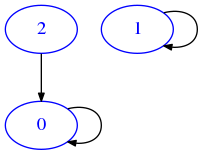

In [13]:
draw_mat(ma)

And another `mb` like this:

In [14]:
mb =  [
            [True, True, False],
            [False, False, True],
            [False, True, False]    
    
      ]

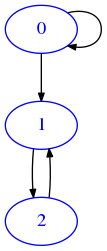

In [15]:
draw_mat(mb)

The result of calling `union(ma, mb)` will be the following: 

In [16]:

res = [[True, True, False], [False, True, True], [True, True, False]]


which will be displayed as

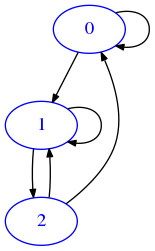

In [17]:
draw_mat(res)

So we get same verteces and edges from both `ma` and `mb`

In [18]:
def union(mata, matb):
    """ Takes two graphs represented as nxn matrices of lists of lists with boolean edges, 
        and RETURN a NEW matrix which is the union of both graphs
       
        if mata row number is different from matb, raises ValueError
    """
    #jupman-raise
    
    if len(mata) != len(matb):
        raise ValueError("mata and matb have different row number a:%s b:%s!" % (len(mata), len(matb)))
                        
                         
    n = len(mata)
    
    ret = []
    for i in range(n):
        row = []
        ret.append(row)
        for j in range(n):
            row.append(mata[i][j] or matb[i][j])
    return ret
    #/jupman-raise

try:
    union([[False],[False]], [[False]])
    raise Exception("Shouldn't arrive here !")
except ValueError:
    "test passed"

try:
    union([[False]], [[False],[False]])
    raise Exception("Shouldn't arrive here !")
except ValueError:
    "test passed"
    
    
    
ma1 =  [
            [False]
       ]
mb1 =  [
            [False]
       ]

assert union(ma1, mb1) == [
                          [False]
                        ]

ma2 =  [
            [False]
       ]
mb2 =  [
            [True]
       ]

assert union(ma2, mb2) == [
                          [True]
                        ]

ma3 =  [
            [True]
       ]
mb3 =  [
            [False]
       ]

assert union(ma3, mb3) == [
                          [True]
                        ]


ma4 =  [
            [True]
       ]
mb4 =  [
            [True]
       ]

assert union(ma4, mb4) == [
                            [True]
                          ]
 
ma5 =  [
            [False, False, False],    
            [False, False, False],
            [False, False, False]        
    
       ]
mb5 =  [
            [True, False, True],
            [False, True, True],    
            [False, False, False]     
       ]

assert union(ma5, mb5) == [
                             [True, False, True],
                             [False, True, True],
                             [False, False, False]        
                          ]

ma6 =  [
            [True, False, True],
            [False, True, True],
            [False, False, False]        
       ]
mb6 =  [
            [False, False, False],    
            [False, False, False],
            [False, False, False]        
    
       ]

assert union(ma6, mb6) == [
                             [True, False, True],
                             [False, True, True],
                             [False, False, False]        
                          ]

ma7 =  [
            [True, False, False],
            [False, True, False],
            [True, False, False] 
       ]

mb7 =  [
            [True, True, False],
            [False, False, True],
            [False, True, False]    
    
       ]

assert union(ma7, mb7) == [
                            [True, True, False],
                            [False, True, True],
                            [True, True, False]

                          ]
    

### is_subgraph

✪✪ If we interpret a matrix as graph, we may wonder when a graph A is a subgraph of another graph B, that is, when A nodes are a subset of B nodes and when A edges are a subset of B edges. For convenience, here we only consider graphs having the same `n` nodes both in A and B. Edges may instead vary. Graphs are represented as boolean matrices.

In [19]:
def is_subgraph(A, B):
    """ RETURN True is A is a subgraph of B, that is, some or all of its edges also belong to B.
        A and B are boolean matrices of size nxn. If sizes don't match, raises ValueError
    """
    #jupman-raise
    n = len(A)
    m = len(B)
    if n != m:
        raise ValueError("A size %s and B size %s  should match !" % (n,m))
    for i in range(n):
        for j in range(n):
            if A[i][j] and not B[i][j]:
                return False
    return True
    #/jupman-raise

# the set of edges is empty

ma = [
   [False]   
]

# the set of edges is empty

mb = [
    [False]
]

# an empty set is always a subset of an empty set

assert is_subgraph(ma, mb) == True


# the set of edges is empty

ma = [
   [False]   
]

# the set of edges contains one element


mb = [
    [True]
]

# an empty set is always a subset of any set, so function gives True
assert is_subgraph(ma, mb) == True


ma = [
   [True]   
]

mb = [
    [True]
]


assert is_subgraph(ma, mb) == True

ma = [
   [True]   
]

mb = [
    [False]
]


assert is_subgraph(ma, mb) == False

ma = [
   [True, False],
   [True, False], 
]

mb = [
    [True, False],
    [True, True],
]


assert is_subgraph(ma, mb) == True

ma = [
    [False, False, True],
    [True, True,True],
    [True, False,True],
]

mb = [
    [True, False, True],
    [True, True,True],
    [True, True,True],
]


assert is_subgraph(ma, mb) == True

### remove_node

✪✪ Here the function text is not so precise, as it is talking about nodes but you have to operate on a matrix. Can you guess exactly what you have to do ? In your experiments, try to draw the matrix before and after executing `remove_node`

In [20]:
def remove_node(mat, i):
    """ MODIFIES mat by removing node i. 
    """
    #jupman-raise
    del mat[i]
    for row in mat:
        del row[i]
    #/jupman-raise
    
m  = [
        [3,5,2,5],
        [6,2,3,7],
        [4,2,1,2],
        [7,2,2,6]
     ]        

remove_node(m,2)

assert len(m) == 3
for i in range(3):
    assert len(m[i]) == 3


### utriang

✪✪✪ You will try to create an upper triangular matrix of side `n`. What could possibly be the graph interpretation of such a matrix? Since `draw_mat` is a generic drawing function doesn't provide the best possible representation, try to draw on paper a more intuitive one.

In [21]:
def utriang(n):
    """ RETURN a matrix of size nxn which is upper triangular, that is, 
        has all nodes below the diagonal 0, while all the other nodes
        are set to 1
    """
    #jupman-raise
    ret = []
    for i in range(n):
        row = []
        for j in range(n):
            if j < i:
                row.append(0)
            else:
                row.append(1)
        ret.append(row)
    return ret
    #/jupman-raise

assert utriang(1) == [
    [1]
]
assert utriang(2) == [
    [1,1],
    [0,1]
]
assert utriang(3) == [
    [1,1,1],
    [0,1,1],
    [0,0,1]
]
assert utriang(4) == [
    [1,1,1,1],
    [0,1,1,1],
    [0,0,1,1],
    [0,0,0,1]
]


### ediff

✪✪✪  The _edge difference_ of two graphs `ediff(da,db)` is a graph with the edges of the first except the edges of the second. For simplicity, here we consider only graphs having the same verteces but possibly different edges. This time we will try operate on graphs represented as dictionaries of adjacency lists. 

For example, if we have

In [22]:
da =  {
          'a':['a','c'],
          'b':['b', 'c'],
          'c':['b','c']
        }

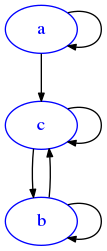

In [23]:
draw_adj(da)

and

In [24]:
db =  {
          'a':['c'],
          'b':['a','b', 'c'],
          'c':['a']
        }


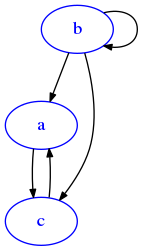

In [25]:
draw_adj(db)

The result of calling `ediff(da,db)` will be:

In [26]:
res = {
         'a':['a'],
         'b':[],
         'c':['b','c']
      }

Which can be shown as 

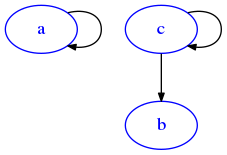

In [27]:
draw_adj(res)

In [28]:
def ediff(da,db):   
    """  Takes two graphs as dictionaries of adjacency lists da and db, and 
         RETURN a NEW graph as dictionary of adjacency lists, containing the same vertices of da, 
         and the edges of da except the edges of db. 
        
        - As order of elements within the adjacency lists, use the same order as found in da.
        - We assume all verteces in da and db are represented in the keys (even if they have 
          no outgoing edge), and that da and db have the same keys
          
          EXAMPLE: 
          
            da =  {
                      'a':['a','c'],
                      'b':['b', 'c'],
                      'c':['b','c']
                    }

            db =  {
                      'a':['c'],
                      'b':['a','b', 'c'],
                      'c':['a']
                    }

            assert ediff(da, db) == {
                                       'a':['a'],
                                       'b':[],
                                       'c':['b','c']
                                     }          
    
    """
    #jupman-raise
        
    ret = {}
    for key in da:
        ret[key] = []
        for target in da[key]:   
            # not efficient but works for us 
            # using sets would be better, see https://stackoverflow.com/a/6486483
            if target not in db[key]:    
                ret[key].append(target)
    return ret
    #/jupman-raise

    

    
da1 =  {
          'a': []
       }
db1 =  {
          'a': []
       }


assert ediff(da1, db1) ==   {
                             'a': []
                           }

da2 =  {
          'a': []
       }
        
db2 =  {
          'a': ['a']
       }

assert ediff(da2, db2) == {
                            'a': []
                         }

da3 =  {
         'a': ['a']
       }
db3 =  {
          'a': []
       }

assert ediff(da3, db3) ==   {
                              'a': ['a']
                           }


da4 =  {
           'a': ['a']
       }
db4 =  {
           'a': ['a']
       }

assert ediff(da4, db4) == {
                           'a': []
                          } 
da5 =  {
          'a':['b'],
          'b':[]
        }
db5 =  {
          'a':['b'],
          'b':[]
       }

assert ediff(da5, db5) == {
                          'a':[],
                          'b':[]    
                        }

da6 =  {
          'a':['b'],
          'b':[]
        }
db6 =  {
          'a':[],
          'b':[]    
        }

assert ediff(da6, db6) == {
                           'a':['b'],
                           'b':[]
                         }

da7 =  {
          'a':['a','b'],
          'b':[]
        }
db7 =  {
          'a':['a'],
          'b':[]    
        }

assert ediff(da7, db7) == {
                           'a':['b'],
                           'b':[]
                         }


da8 =  {
          'a':['a','b'],
          'b':['a']
        }
db8 =  {
          'a':['a'],
          'b':['b']    
        }

assert ediff(da8, db8) == {
                           'a':['b'],
                           'b':['a']
                         }

da9 =  {
          'a':['a','c'],
          'b':['b', 'c'],
          'c':['b','c']
        }

db9 =  {
          'a':['c'],
          'b':['a','b', 'c'],
          'c':['a']
        }

assert ediff(da9, db9) == {
                           'a':['a'],
                           'b':[],
                           'c':['b','c']
                         }


### pyramid

✪✪✪ The following function requires to create a matrix filled with non-zero numbers. Even if don't know exactly the network meaning, with ust this fact we can conclude that all nodes are linked to all others. A graph where this happens is called a _clique_ (the Italian name is _cricca_  - where have you already seen it? ;-)

In [29]:
def pyramid(n):
    """
        Takes an odd number n >= 1 and RETURN a matrix as list of lists containing numbers displaced like this
        example for a pyramid of square 7:
        if n is even, raises ValueError 

        1111111
        1222221   
        1233321 
        1234321
        1233321
        1222221
        1111111
    """            
    #jupman-raise
    if n % 2 == 0:
        raise ValueError("n should be odd, found instead %s" % n)
    ret = [[0]*n for i in range(n)]
    for i in range(n//2 + 1):
        for j in range(n//2 +1):
            ret[i][j] = min(i, j) + 1
            ret[i][n-j-1] = min(i, j) + 1
            ret[n-i-1][j] = min(i, j) + 1
            ret[n-i-1][n-j-1] = min(i, j) + 1
        
    ret[n//2][n//2] = n // 2 + 1
    return ret
    #/jupman-raise

try: 
    pyramid(4)
    raise Exception("SHOULD HAVE FAILED!")
except ValueError:
    "passed test"
    
assert pyramid(1) == [
                        [1]
                    ]

assert pyramid(3) == [
                        [1,1,1],
                        [1,2,1],
                        [1,1,1]
                    ]

assert pyramid(5) == [
                        [1, 1, 1, 1, 1],
                        [1, 2, 2, 2, 1], 
                        [1, 2, 3, 2, 1], 
                        [1, 2, 2, 2, 1], 
                        [1, 1, 1, 1, 1]
                    ]


## Adjacency lists

So far, we represented graphs as matrices, saying they are good when the graph is dense, that is any given node is likely to be connected to almost all other nodes - or equivalently, many cell entries in the matrix are different from zero. But if this is not the case, other representations might be needed. For example, we can represent a graph as a _adjacency lists_.

Let's look at this 6x6 boolean matrix:


In [30]:
m = [
    [False, False, False, False, False, False],
    [False, False, False, False, False, False],
    [True,  False, False, True,  False, False],
    [False, False, False, False, False, False],
    [False, False, False, False, False, False],
    [False, False, True,  False, False, False]
]


We see just a few `True`, so by drawing it we don't expect to see many edges:

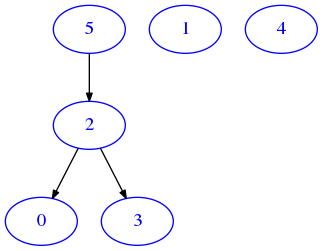

In [31]:
draw_mat(m)

As a more compact representation, we might represent the data as a dictionary of _adjacency lists_ where the keys are the node indexes and the to each node we associate a list with the target nodes it points to.

To reproduce the example above, we can write like this:

In [32]:

d = {
         0: [],     # node 0 links to nothing
         1: [],     # node 1 links to nothing
         2: [0,3],  # node 2 links to node 0 and 3
         3: [],     # node 3 links to nothing
         4: [],     # node 4 links to nothing
         5: [2]     # node 5 links to node 2
       }


In `sciprog.py`, we provide also a function `sciprog.draw_adj` to quickly inspect such data structure:

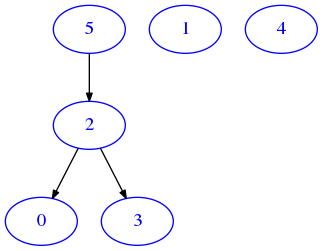

In [33]:
from sciprog import draw_adj

draw_adj(d)

As expected, the resulting graph is the same as for the equivalent matrix representation.

### mat_to_adj

✪✪ Implement a function that takes a boolean nxn matrix and RETURN the equivalent representation as dictionary of adjacency lists. Remember that to create an empty dict you have to write `dict()`


In [34]:
def mat_to_adj(bool_mat):
    #jupman-raise
    ret = dict()
    n = len(bool_mat)
    for i in range(n):
        ret[i] = []
        for j in range(n):
            if bool_mat[i][j]:
                ret[i].append(j)
    return ret
    #/jupman-raise

m1 = [
        [False]
    ]

d1 =  {
         0:[]
     }

assert mat_to_adj(m1) == d1

m2 = [
        [True]
    ]

d2 =  {
         0:[0]
     }

assert mat_to_adj(m2) == d2


m3 = [
        [False,False],
        [False,False]
    ]

d3 =  {
         0:[],
         1:[]
     }


assert mat_to_adj(m3) == d3


m4 = [
        [True,True],
        [True,True]
    ]

d4 =  {
         0:[0,1],
         1:[0,1]
     }


assert mat_to_adj(m4) == d4

m5 = [
        [False,False],
        [False,True]
    ]

d5 =  {
         0:[],
         1:[1]
     }


assert mat_to_adj(m5) == d5


m6 = [
        [True,False,False],
        [True, True,False],
        [False,True,False]  
    ]

d6 =  {
         0:[0],
         1:[0,1],
         2:[1]
     }


assert mat_to_adj(m6) == d6
                 

### mat_ids_to_adj

✪✪ Implement a function that takes a boolean nxn matrix and a list of immutable identifiers for the nodes, and RETURN the equivalent representation as dictionary of adjacency lists.
        
* If matrix is not `n`x`n` or `ids` length does not match `n`, raise `ValueError`

In [35]:
def mat_ids_to_adj(bool_mat, ids):
    #jupman-raise
    
    ret = dict()
    n = len(bool_mat)
    m = len(bool_mat[0])
    if n != m:
        raise ValueError('matrix is not nxn !')
    if n != len(ids):
        raise ValueError("Identifiers quantity is different from matrix size!" )
    for i in range(n):
        ret[ids[i]] = []
        for j in range(n):
            if bool_mat[i][j]:
                ret[ids[i]].append(ids[j])
    return ret
    #/jupman-raise
    

try: 
    mat_ids_to_adj([[False, True]], ['a','b'])
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"  

try: 
    mat_ids_to_adj([[False]], ['a','b'])
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"      
    
m1 = [
        [False]
    ]

d1 =  { 'a':[] }
assert mat_ids_to_adj(m1, ['a']) == d1

m2 = [
        [True]
    ]

d2 =  { 'a':['a'] }
assert mat_ids_to_adj(m2, ['a']) == d2


m3 = [
        [False,False],
        [False,False]
    ]

d3 =  {
         'a':[],
         'b':[]
     }
assert mat_ids_to_adj(m3,['a','b']) == d3


m4 = [
        [True,True],
        [True,True]
    ]

d4 =  {
         'a':['a','b'],
         'b':['a','b']
     }
assert mat_ids_to_adj(m4, ['a','b']) == d4

m5 = [
        [False,False],
        [False,True]
    ]

d5 =  {
         'a':[],
         'b':['b']
     }


assert mat_ids_to_adj(m5,['a','b']) == d5


m6 = [
        [True,False,False],
        [True, True,False],
        [False,True,False]  
    ]

d6 =  {
         'a':['a'],
         'b':['a','b'],
         'c':['b']
     }


assert mat_ids_to_adj(m6,['a','b','c']) == d6
                 

### adj_to_mat

✪✪✪ Try now conversion from dictionary of adjacency list to matrix  (this is a bit hard). 

To solve this, the general idea is that you have to fill an nxn matrix to return. During the filling of a cell at row `i` and column `j`, you have to decide whether to put a `True` or a `False`. You should put `True` if in the `d` list value corresponding to the `i-th` key, there is contained a number equal to `j`. Otherwise, you should put `False`.

If you look at the tests, as inputs we are passing `OrderedDict`. The reason is that when we check the output matrix of your function, we want to be sure the matrix rows are ordered in a certain way.

But you have to assume  d can contain arbitrary ids with no precise ordering, so:

1. first you should scan the dictionary and lists to save the mapping between indexes to ids in a separate list
 
 **NOTE**: `d.keys()` is not exactly a list (does not allow access by index), so you must convert to list with this:  `list(d.keys())`
 
2. then you should build the matrix to return, using the previously built list when needed.


Now implement the function: 

In [36]:
def adj_to_mat(d):
    """ Take a dictionary of adjacency lists with arbitrary ids and
        RETURN its representation as an nxn boolean matrix (assume 
        all nodes are present as keys)
        
        - Assume d is a simple dictionary (not necessarily an OrderedDict)
                      
    """
    #jupman-raise
    ret = []
    n = len(d)
    ids_to_row_indexes = dict()
    # first maps row indexes to keys 
    row_indexes_to_ids = list(d.keys()) # because d.keys() is *not* indexable !
    i = 0
    for key in d: 
        row = []
        ret.append(row)
        for j in range(n):
            if  row_indexes_to_ids[j] in d[key]:
                row.append(True)
            else:
                row.append(False)
        i += 1
    return ret
    #/jupman-raise

from collections import OrderedDict
od1 = OrderedDict([
                    ('a',[])
                 ])
m1 = [ [False] ]
assert adj_to_mat(od1) == m1

od2 = OrderedDict([
                    ('a',['a'])
                 ])
m2 = [ [True] ]

assert adj_to_mat(od2) == m2

od3 = OrderedDict([
                    ('a',['a','b']),
                    ('b',['a','b']),
                 ])
m3 = [ 
        [True, True],
        [True, True]
     ]

assert adj_to_mat(od3) == m3


od4 = OrderedDict([
                    ('a',[]),
                    ('b',[]),
                 ])

m4 = [ 
        [False, False],
        [False, False]
     ]

assert adj_to_mat(od4) == m4

od5 = OrderedDict([
                    ('a',['a']),
                    ('b',['a','b']),
                 ])

m5 = [ 
        [True, False],
        [True, True]
     ]

assert adj_to_mat(od5) == m5


od6 = OrderedDict([
                    ('a',['a','c']),
                    ('b',['c']),
                    ('c',['a','b']),
                 ])

m6 = [ 
        [True, False, True],
        [False, False, True],
        [True, True, False],
     ]

assert adj_to_mat(od6) == m6

### table_to_adj 

Suppose you have a table expressed as a list of lists with headers like this:


In [37]:
m0 =    [
            ['Identifier','Price','Quantity'],
            ['a',1,1],  
            ['b',5,8],
            ['c',2,6],
            ['d',8,5],
            ['e',7,3]
        ]


where `a`, `b`, `c` etc are the row identifiers (imagine they represent items in a store), `Price` and `Quantity` are properties they might have. **NOTE**: here we put two properties, but they might have `n` properties !

We want to transform such table into a graph-like format as a dictionary of lists, which relates store items as keys to the properties they might have. To include in the list both the property identifier and its value, we will use tuples. So you need to write a function that transforms the above input into this:

In [38]:
res0 =  {
            'a':[('Price',1),('Quantity',1)],
            'b':[('Price',5),('Quantity',8)],
            'c':[('Price',2),('Quantity',6)],
            'd':[('Price',8),('Quantity',5)],
            'e':[('Price',7),('Quantity',3)]
        }

In [39]:
def table_to_adj(table):
    #jupman-raise
    ret = {}
    headers = table[0]

    for row in table[1:]: 
        lst = []
        for j in range(1, len(row)):
            lst.append((headers[j], row[j]))
        ret[row[0]] = lst
    return ret
    #/jupman-raise    
    
m0 = [
        ['I','P','Q']
     ]
res0 = {}

assert res0 == table_to_adj(m0)    

m1 =    [
            ['Identifier','Price','Quantity'],
            ['a',1,1],  
            ['b',5,8],
            ['c',2,6],
            ['d',8,5],
            ['e',7,3]
        ]
res1 = {
            'a':[('Price',1),('Quantity',1)],
            'b':[('Price',5),('Quantity',8)],
            'c':[('Price',2),('Quantity',6)],
            'd':[('Price',8),('Quantity',5)],
            'e':[('Price',7),('Quantity',3)]
        }

assert res1 == table_to_adj(m1)

m2 =    [
            ['I','P','Q'],
            ['a','x','y'],  
            ['b','w','z'],
            ['c','z','x'],
            ['d','w','w'],
            ['e','y','x']
        ]   
res2 =  {
            'a':[('P','x'),('Q','y')],
            'b':[('P','w'),('Q','z')],
            'c':[('P','z'),('Q','x')],
            'd':[('P','w'),('Q','w')],
            'e':[('P','y'),('Q','x')]
        }

assert res2 == table_to_adj(m2)

m3 = [
        ['I','P','Q', 'R'],
        ['a','x','y', 'x'],
        ['b','z','x', 'y'],
]

res3 = {
            'a':[('P','x'),('Q','y'), ('R','x')],
            'b':[('P','z'),('Q','x'), ('R','y')],
    
}


assert res3 == table_to_adj(m3)


## Networkx

**Before continuing, make sure to have installed the**  [required libraries](#Required-libraries)

Networkx is a  library to perform statistics on networks. For now, it will offer us a richer data structure where we can store the properties we want in nodes and also edges.

You can initialize networkx objects with the dictionary of adjacency lists we've alredy seen:

In [40]:

import networkx as nx

# notice with networkx if nodes are already referenced to in an adjacency list 
# you do not need to put them as keys:

G=nx.DiGraph({
    'a':['b','c'],        # node a links to b and c
    'b':['b','c', 'd']    # node b links to b itself, c and d
})


The resulting object is not a simple dict, but something more complex:

In [41]:
G

To display it in a way uniform with the rest of the course, we developed a function called `sciprog.draw_nx` :

In [42]:
from sciprog import draw_nx

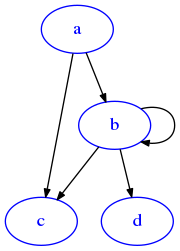

In [43]:
draw_nx(G)

From the picture above, we notice there are no weights displayed, because in networkx they are just  considered optional attributes of edges. 

To see all the attributes of an edge, you can write like this:

In [44]:
G['a']['b']

{}

This graph has no attributes for the node, so we get back an empty dict. If we wanted to add a weight of `123` to that particular `a b` edge, you could write like this:

In [45]:
G['a']['b']['weight'] = 123

In [46]:
G['a']['b']

{'weight': 123}

Let's try to display it:

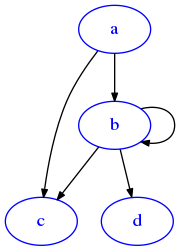

In [47]:
draw_nx(G)

We still don't see the weight as weight can be one of many properties: the only thing that gets displayed is the propery `label`. So let's set label equal to the weight:

In [48]:
G['a']['b']['label'] = 123

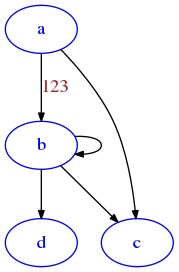

In [49]:
draw_nx(G)

### Converting networkx graphs

If you try to just output the string representation of the graph, networkx will give the empty string:

In [50]:
print(G)

In [51]:
str(G)

''

In [52]:
repr(G)

'<networkx.classes.digraph.DiGraph object at 0x7fef507c1080>'

To convert to the dict of adjacency lists we know, you can use this method:

In [53]:
nx.to_dict_of_lists(G)

{'a': ['b', 'c'], 'b': ['b', 'c', 'd'], 'c': [], 'd': []}

The above works, but it doesn't convert additional edge info. For a complete conversion, use `nx.to_dict_of_dicts`

In [54]:
nx.to_dict_of_dicts(G)

{'a': {'b': {'weight': 123, 'label': 123}, 'c': {}},
 'b': {'b': {}, 'c': {}, 'd': {}},
 'c': {},
 'd': {}}

### mat_to_nx

✪✪ Now try by yourself to convert a matrix as list of lists along with node ids (like [you did before](#mat_ids_to_adj)) into a networkx object.

This time, don't create a dictionary to pass it to `nx.DiGraph` constructor: instead, use networkx methods like `.add_edge` and `add_node`. For usage example, check the [networkx tutorial](https://networkx.github.io/documentation/stable/tutorial.html). Do you need to explicitly call `add_node` before referring to some node with `add_edge` ?

In [55]:
def mat_to_nx(mat, ids):
    """ Given a real-valued nxn matrix as list of lists and a list of immutable identifiers for the nodes,
        RETURN the corresponding graph in networkx format (as nx.DiGraph). 
        
        If matrix is not nxn or ids length does not match n, raise ValueError
        
        - DON'T transform into a dict, use add_ methods from networkx object!
        - WARNING: Remember to set the labels to the weights AS STRINGS!
    """
            
    #jupman-raise
    
    G = nx.DiGraph()
    n = len(mat)
    m = len(mat[0])
    if n != m:
        raise ValueError('matrix is not nxn !')
    if n != len(ids):
        raise ValueError("Identifiers quantity is different from matrix size!" )
    for i in range(n):
        G.add_node(ids[i])
        for j in range(n):
            if mat[i][j] != 0:
                G.add_edge(ids[i], ids[j])
                G[ids[i]][ids[j]]['weight'] = mat[i][j]
                G[ids[i]][ids[j]]['label'] = str(mat[i][j])
    return G
    #/jupman-raise
        
    

try: 
    mat_ids_to_adj([[0, 3]], ['a','b'])
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"  

try: 
    mat_ids_to_adj([[0]], ['a','b'])
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"      
    
m1 = [
        [0]
    ]

d1 =  {'a': {}}

assert nx.to_dict_of_dicts(mat_to_nx(m1, ['a'])) == d1

m2 = [
        [7]
    ]

d2 =  {'a': {'a': {'weight': 7, 'label': '7'}}}
assert nx.to_dict_of_dicts(mat_to_nx(m2, ['a'])) == d2


m3 = [
        [0,0],
        [0,0]
    ]

d3 =  {
         'a':{},
         'b':{}
     }
assert nx.to_dict_of_dicts(mat_to_nx(m3,['a','b'])) == d3


m4 = [
        [7,9],
        [8,6]
    ]

d4 =  {
         'a':{'a': {'weight':7,'label':'7'},
              'b' : {'weight':9,'label':'9'},
             },
         'b':{'a': {'weight':8,'label':'8'},
              'b' : {'weight':6,'label':'6'},
             }
              
     }
assert nx.to_dict_of_dicts(mat_to_nx(m4, ['a','b'])) == d4

m5 = [
        [0,0],
        [0,7]
    ]

d5 =  {
         'a':{},
         'b':{
                 'b' : {'weight':7,'label':'7'},
             }

     }


assert nx.to_dict_of_dicts(mat_to_nx(m5,['a','b'])) == d5


m6 = [
        [7,0,0],
        [7,9,0],
        [0,7,0]  
    ]

d6 =  {
         'a':{
                'a' : {'weight':7,'label':'7'},
             },
         'b': {
                'a':  {'weight':7,'label':'7'},
                'b' : {'weight':9,'label':'9'}
               },

         'c':{
              'b' : {'weight':7,'label':'7'}
             }
     }


assert nx.to_dict_of_dicts(mat_to_nx(m6,['a','b','c'])) == d6
    

## Simple statistics

We will now compute simple statistics abour graphs. More advanced stuff will be done in Part B notebook about [graph algorithms](https://sciprog.davidleoni.it/graph-algos/graph-algos.html). 


### Outdegrees and indegrees

The _out-degree_ $\deg^+(v)$ of a node $v$ is the number of edges going out from it, while the _in-degree_ $\deg^-(v)$ is the number of edges going into it. 

_NOTE_: the out-degree and in-degree are _not_ the sum of weights ! They just count presence or absence of edges.

For example, consider this graph:


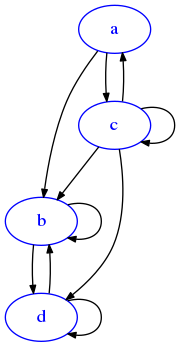

In [56]:
from sciprog import draw_adj

d = {
    'a' : ['b','c'],  
    'b' : ['b','d'],  
    'c' : ['a','b','c','d'],  
    'd' : ['b','d']   
}


draw_adj(d)

The out-degree of `d` is 2, because it has one outgoing edge to `b` but also an outgoing edge to itself. The indegree of `d` is 3, because it has an edge coming from `b`, one from `c` and one self-loop from `d` itself.

### outdegree_adj

In [57]:
def outdegree_adj(d, v):
    """ RETURN the outdegree of a node from graph d represented as a dictionary of adjacency lists
    
        If v is not a vertex of d, raise ValueError
    """
    #jupman-raise
    if v not in d:
        raise ValueError("Vertex %s is not in %s" % (v, d))
    
    return len(d[v])
    #/jupman-raise

try: 
    outdegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
assert outdegree_adj({
        'a':[]
},'a') == 0

assert outdegree_adj({
        'a':['a']
},'a') == 1

assert outdegree_adj({
        'a':['a','b'],
        'b':[]
},'a') == 2

assert outdegree_adj({
        'a':['a','b'],
        'b':['a','b','c'],
        'c':[]
},'b') == 3




### outdegree_mat

✪✪ RETURN the outdegree of a node `i` from a graph boolean matrix nxn represented as a list of lists
    
- If `i` is not a node of the graph, raise `ValueError`



In [58]:
def outdegree_mat(mat, i):
    #jupman-raise
    n = len(mat)
    if i < 0 or i > n: 
        raise ValueError("i %s is not a row of matrix %s" % (i, mat))
    ret = 0    
    for j in range(n):
        if mat[i][j]:
            ret += 1
    return ret
    #/jupman-raise

try: 
    outdegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

try: 
    outdegree_mat([[False]],-1)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

    
assert outdegree_mat(
        [
            [False]
        ]
,0) == 0

assert outdegree_mat(
        [
            [True]
        ],0) == 1

assert outdegree_mat(
        [
            [True, True],
            [False, False]
        ],0) == 2

assert outdegree_mat(
        [
            [True, True, False],
            [True, True, True],
            [False, False, False],            
        ]
,1) == 3


### outdegree_avg

✪✪ RETURN the average outdegree of nodes in graph `d`, represented as dictionary of adjacency lists. 
    
- Assume all nodes are in the keys.



In [59]:
def outdegree_avg(d):
    #jupman-raise
    s = 0
    for k in d: 
        s += len(d[k])
    return s / len(d)
    #/jupman-raise
    
assert outdegree_avg({
        'a':[]
}) == 0

assert round(
                outdegree_avg({
                    'a':['a']
                })
            ,2) == 1.00 / 1.00

assert round(
                outdegree_avg({
                    'a':['a','b'],
                    'b':[]
                })
            ,2) == (2 + 0) / 2

assert round(
                outdegree_avg({
                    'a':['a','b'],
                    'b':['a','b','c'],
                    'c':[]
                }) 
        ,2) == round( (2 + 3) / 3 , 2)

### indegree_adj

The indegree of a node `v` is the number of edges going into it. 

✪✪  RETURN the indegree of node `v` in graph `d`, represented as a dictionary of adjacency lists
    
- If `v` is not a node of the graph, raise `ValueError`

In [60]:
def indegree_adj(d, v):
    #jupman-raise
    if v not in d:
        raise ValueError("Vertex %s is not in %s" % (v, d))
    ret = 0
    for k in d:
        if v in d[k]:
            ret += 1
    return ret
    #/jupman-raise
    
try: 
    indegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"


assert indegree_adj({
        'a':[]
},'a') == 0

assert indegree_adj({
        'a':['a']
},'a') == 1

assert indegree_adj({
        'a':['a','b'],
        'b':[]
},'a') == 1

assert indegree_adj({
        'a':['a','b'],
        'b':['a','b','c'],
        'c':[]
},'b') == 2



### indegree_mat

✪✪ RETURN the indegree of a node `i` from a graph boolean matrix nxn represented as a list of lists
    
- If `i` is not a node of the graph, raise `ValueError`

In [61]:

def indegree_mat(mat, i):
    #jupman-raise
    n = len(mat)
    if i < 0 or i > n: 
        raise ValueError("i %s is not a row of matrix %s" % (i, mat))
    ret = 0    
    for k in range(n):
        if mat[k][i]:
            ret += 1
    return ret
    #/jupman-raise
    


try: 
    indegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
assert indegree_mat(
        [
            [False]
        ]
,0) == 0

assert indegree_mat(
        [
            [True]
        ],0) == 1

assert indegree_mat(
        [
            [True, True],
            [False, False]
        ],0) == 1

assert indegree_mat(
        [
            [True, True, False],
            [True, True, True],
            [False, False, False],            
        ]
,1) == 2


### indegree_avg

✪✪ RETURN the average indegree of nodes in graph `d`, represented as dictionary of adjacency lists. 
    
- Assume all nodes are in the keys


In [62]:
def indegree_avg(d):
    #jupman-raise
    s = 0
    for k in d: 
        s += len(d[k])
    return s / len(d)
    #/jupman-raise
    
assert indegree_avg({
        'a':[]
}) == 0

assert round(
                indegree_avg({
                    'a':['a']
                })
            ,2) == 1.00 / 1.00

assert round(
                indegree_avg({
                    'a':['a','b'],
                    'b':[]
                })
            ,2) == (1 + 1) / 2

assert round(
                indegree_avg({
                    'a':['a','b'],
                    'b':['a','b','c'],
                    'c':[]
                }) 
        ,2) == round( (2 + 2 + 1) / 3 , 2)

### Was it worth it?

**QUESTION**: Is there any difference between the results of `indegree_avg` and `outdegree_avg` ?

**ANSWER**: They give the same result. Think about what you did: for `outdegree_avg` you summed over all rows and then divided by `n`. For `indegree_avg` you summed over all columns, and then divided by `n`. 


More formally, we have that the so-called _degree sum formula_ holds (see [Wikipedia](https://en.wikipedia.org/wiki/Directed_graph#Indegree_and_outdegree) for more info):


$\sum_{v \in V} \deg^-(v) = \sum_{v \in V} \deg^+(v) = |A|$

### min_outdeg

Difficulty: ✪✪✪

**Before proceeding please make sure you read** [recursions on lists](https://sciprog.davidleoni.it/lists/lists-sol.html) **chapter**

In [63]:

def helper(mat, start, end):
    """
        Takes a graph as matrix of list of lists  and RETURN the minimum 
        outdegree of nodes with row index between indeces start (included) 
        and end included
        
        This function MUST be recursive, so it must call itself.
        
        - HINT: REMEMBER to put return instructions in all 'if' branches!
    """
    #jupman-raise
    n = len(mat)
    if start == end:
        return mat[start].count(True)
    else:
        half = (start + end) // 2
        min_left = helper(mat, 0, half)
        min_right = helper(mat, half+1, end)
        return min(min_left, min_right)
    #/jupman-raise
    
def min_outdeg(mat):
    """
        Takes a graph as matrix of list of lists  and RETURN the minimum 
        outdegree of nodes by calling function helper. 
        min_outdeg function is *not* recursive, only function helper is.
    """    
    #jupman-raise
    n = len(mat)
    return helper(mat, 0, len(mat) - 1)
    #/jupman-raise

assert min_outdeg(
        [
            [False]
        ]) == 0

assert min_outdeg(
        [
            [True]
        ]) == 1

assert min_outdeg(
        [
            [False, True],
            [True, False]
        ]) == 1

assert min_outdeg(
        [
            [True, True, False],
            [True, True, True],
            [False, True, True],            
        ]) == 2


assert min_outdeg(
        [
            [True, True, False],
            [True, True, True],
            [False, True, False],            
        ]) == 1


assert min_outdeg(
        [
            [True, True, True],
            [True, True, True],
            [False, True, False],            
        ]) == 1


        

### networkx Indegrees and outdegrees 

With Networkx we can easily calculate indegrees and outdegrees of a node:


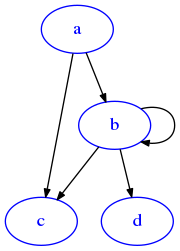

In [64]:

import networkx as nx

# notice with networkx if nodes are already referenced to in an adjacency list 
# you do not need to put them as keys:

G=nx.DiGraph({
    'a':['b','c'],        # node a links to b and c
    'b':['b','c', 'd']    # node b links to b itself, c and d
})

draw_nx(G)

In [65]:
G.out_degree('a')

2

**QUESTION**: What is the outdegree of `'b'` ? Try to think about it and then confirm your thoughts with networkx:

In [66]:
# write here
#print("indegree  b:  %s" % G.in_degree('b'))
#print("outdegree b:  %s" % G.out_degree('b'))

**QUESTION**: We defined _indegree_ and _outdegree_. Can you guess what the _degree_ might be ? In particular, for a self pointing node like `'b'`, what could it be? Try to use `G.degree('b')` methods to validate your thoughts.

In [67]:
# write here
#print("degree  b:  %s" % G.degree('b'))

**ANSWER**: it is the sum of indegree and outdegree. In presence of a self-loop like for `'b'`, we count the self-loop twice, once as outgoing edge and one as incident edge

In [68]:
# write here
#G.degree('b')

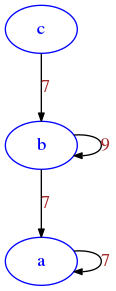

In [69]:
draw_nx(mat_to_nx([
        [7,0,0],
        [7,9,0],
        [0,7,0]  
    ], ['a','b','c']))